# Bonus: Temperature Analysis I

In [97]:
import pandas as pd
from datetime import datetime as dt
from scipy import stats
%matplotlib inline
from matplotlib import pyplot as plt
from statistics import mean 

In [61]:
# "tobs" is "temperature observations"
df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [62]:
# Convert the date column format from string to datetime
df['date']= pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  19550 non-null  object        
 1   date     19550 non-null  datetime64[ns]
 2   prcp     18103 non-null  float64       
 3   tobs     19550 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 611.1+ KB


In [63]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [64]:
df.head()

,station,date,prcp,tobs,month
0,USC00519397,2010-01-01,0.08,65,1
1,USC00519397,2010-01-02,0.00,63,1
2,USC00519397,2010-01-03,0.00,74,1
3,USC00519397,2010-01-04,0.00,76,1
4,USC00519397,2010-01-06,NaN,73,1


In [65]:
# Filter data for desired months
jun_dec_df = df[((df['month'] == 6) | (df['month'] == 12))]
jun_dec_df

,station,date,prcp,tobs,month
133,USC00519397,2010-06-01,0.00,78,6
134,USC00519397,2010-06-02,0.01,76,6
135,USC00519397,2010-06-03,0.00,78,6
136,USC00519397,2010-06-04,0.00,76,6
137,USC00519397,2010-06-05,0.00,77,6
...,...,...,...,...,...
19492,USC00516128,2017-06-26,0.02,79,6
19493,USC00516128,2017-06-27,0.10,74,6
19494,USC00516128,2017-06-28,0.02,74,6
19495,USC00516128,2017-06-29,0.04,76,6


### Compare June and December data across all years 

In [66]:
# Identify the average temperature for June and December
grouped_df = jun_dec_df.groupby(['month'])
mean_tobs = grouped_df['tobs'].mean()
median_tobs = grouped_df['tobs'].median()
variance_tobs = grouped_df['tobs'].var()
std_tobs = grouped_df['tobs'].std()
sem_tobs = grouped_df['tobs'].sem()

# Identify the average temperature for December / June
# Assemble the resulting series into a single summary dataframe.

summary_stats_df = pd.DataFrame(
    {"Mean": mean_tobs,
     "Median": median_tobs,
     "Variance": variance_tobs,
     "Standard Deviation": std_tobs,
     "Standard Error of the Mean": sem_tobs
    })
summary_stats_df




,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
month,,,,,
6,74.944118,75,10.610766,3.257417,0.079004
12,71.041529,71,14.031915,3.745920,0.096176


In [110]:
# Create collections of temperature data
jun_df = df[(df['month'] == 6)]
jun_tobs = []
for index, row in jun_df.iterrows():            
    jun_tobs.append(row['tobs'])

dec_df = df[(df['month'] == 12)]
dec_tobs = []
for index, row in dec_df.iterrows():        
    dec_tobs.append(row['tobs'])   

In [111]:
# Run paired t-test
stats.ttest_ind(jun_tobs,dec_tobs)


Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

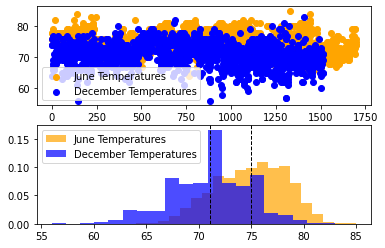

In [108]:
# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(jun_tobs)), jun_tobs, label="June Temperatures", color="orange")
plt.scatter(range(len(dec_tobs)), dec_tobs, label="December Temperatures", color="blue")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(jun_tobs, 20, density=True, alpha=0.7, label="June Temperatures",color="orange")
plt.hist(dec_tobs, 20, density=True, alpha=0.7, label="December Temperatures",color="blue")
plt.axvline(mean(jun_tobs), color='k', linestyle='dashed', linewidth=1)
plt.axvline(mean(dec_tobs), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
plt.savefig('Images/figure5_temp_analysis.png')